# Convolutional and Pooling Operations

**Convolutional Operation**

Convolution operations involve sliding a small filter over input data to detect and extract relevant features, allowing the model to recognize patterns within data.


This output feature map is an altered representation of the input image, where certain features may be enhanced or extracted.

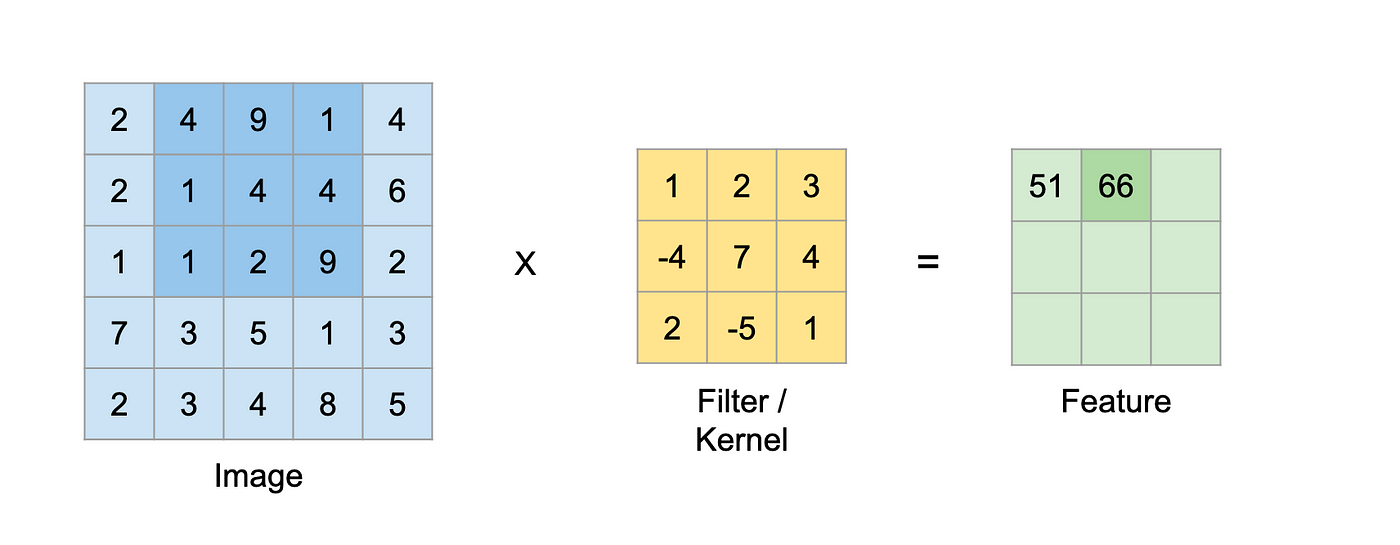

**Convolution Operation Example**

Here is a 2D convolution operation between a 4x4 input image and a 2x2 kernel using NumPy.  

It calculates the output feature map by sliding the kernel using a nested for loop, then computes the product and sums the values for each region.

In [ ]:
import numpy as np

# Define the input image and the kernel (filter)
image = np.array([[3, 1, 2, 1, 4],
                 [2, 5, 3, 2, 1],
                 [4, 2, 6, 3, 2],
                 [1, 4, 3, 5, 4],
                 [2, 1, 4, 2, 3]])

kernel = np.array([[2, 1],
                  [1, 0]])

# Get the dimensions of the input image and kernel
image_height, image_width = image.shape
kernel_height, kernel_width = kernel.shape

# Initialize the output feature map with zeros
feature_map_height = image_height - kernel_height + 1
feature_map_width = image_width - kernel_width + 1
feature_map = np.zeros((feature_map_height, feature_map_width))

# Perform the convolution operation
for i in range(feature_map_height):
    for j in range(feature_map_width):
        # Extract the region of interest (ROI) from the input image
        roi = image[i:i+kernel_height, j:j+kernel_width]

        # Compute the element-wise multiplication and sum
        feature_map[i, j] = np.sum(roi * kernel)

# Print the output feature map (result of the convolution)
print("Output feature map:")
print(feature_map)

**Max Pooling Operation**

Max pooling is a technique that reduces the spatial dimensions of the input feature map by selecting the maximum value within grid regions.

This operation helps the network understand important features despite where the exact position might be. It also helps reduce the computational complexity of the model.

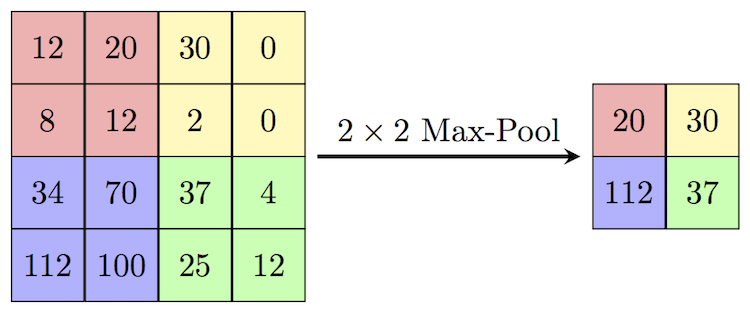

**Max Pooling Example**

In [ ]:
import numpy as np

# Use the feature map from the previous convolutional operation
input_feature_map = feature_map

# Define the size of the pooling window (e.g., 2x2)
pooling_window_size = (2, 2)

# Calculate the dimensions of the output feature map
output_height = input_feature_map.shape[0] // pooling_window_size[0]
output_width = input_feature_map.shape[1] // pooling_window_size[1]

# Initialize the output feature map with zeros
output_feature_map = np.zeros((output_height, output_width))

# Perform max pooling
for i in range(output_height):
    for j in range(output_width):
        # Extract the region of interest (ROI) from the input feature map
        roi = input_feature_map[i * pooling_window_size[0]: (i + 1) * pooling_window_size[0],
                               j * pooling_window_size[1]: (j + 1) * pooling_window_size[1]]

        # Take the maximum value from the ROI
        output_feature_map[i, j] = np.max(roi)

# Print the output feature map (result of max pooling)
print("Output feature map after max pooling:")
print(output_feature_map)

**Bringing it together**

There will typically be a ReLU operation between the convolution and pooling stage.

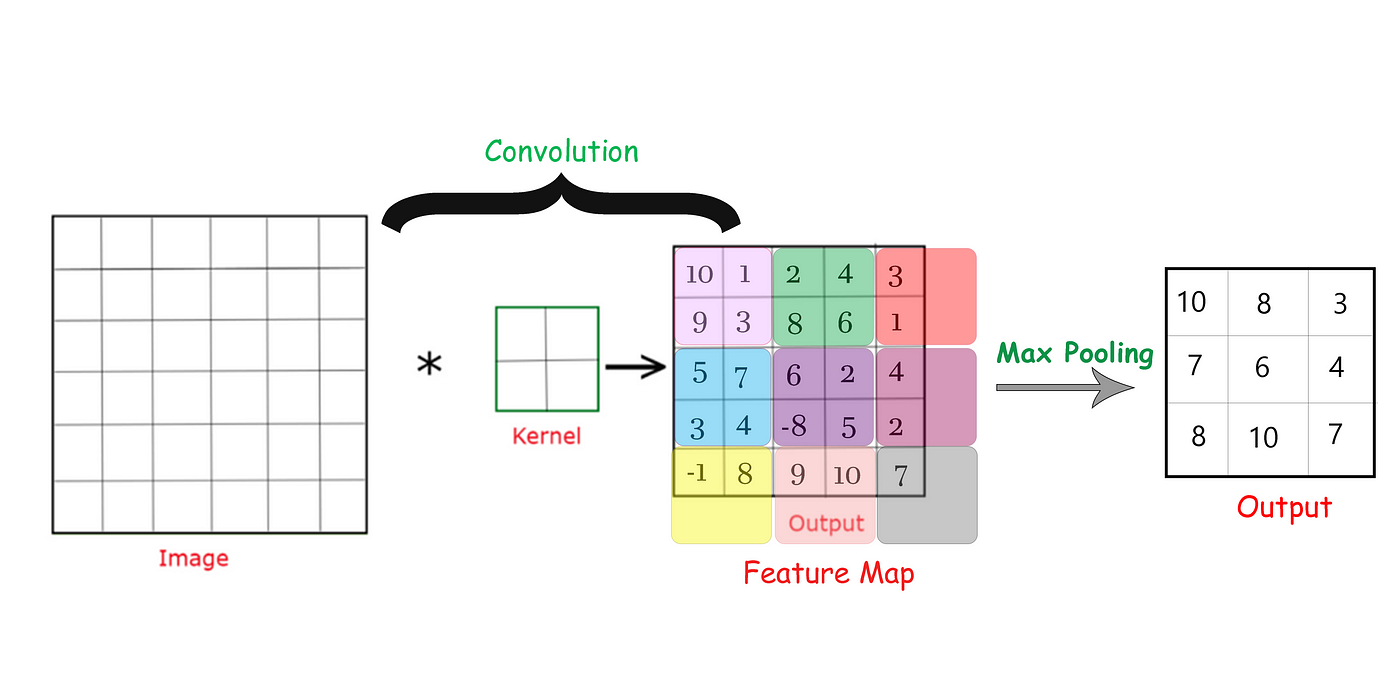

# Convolutional Neural Network

A Convolutional Neural Network (CNN) is a specialized neural network for processing visual data, using convolutional and pooling layers to automatically learn and extract features.

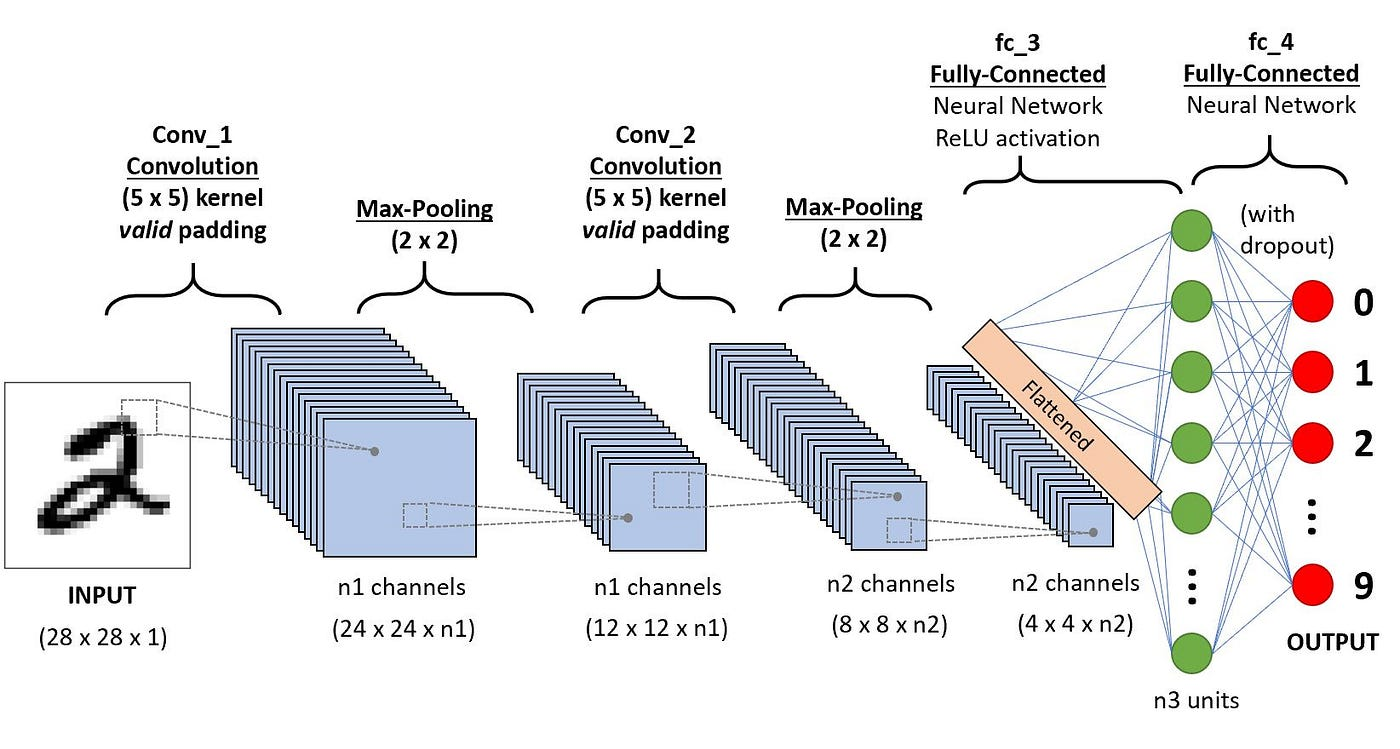

**CNN Example**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # (Input Channels, Output Channels, Kernel Size, Padding)
        self.relu1 = nn.ReLU() # Activation function that introduces non-linearity (Converts negative numbers to 0)
        self.pool1 = nn.MaxPool2d(2, 2) # (Dimensions, Stride)

        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(2048, 128) # Fully connected linear layer, (flattened 1D tensor size, connected to 128 neurons)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10) # connects the 128-dimensional output of fc1 to 10 neurons

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 2048) # Flattening into a 1D tensor, -1 means batch size is automatic
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

**Training Example**

In [ ]:
# Data transformation pipeline for preprocessing the dataset (CIFAR-10 in this case)
transform_pipeline = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize input data
])

# Set the batch size for training, size represents how much data is being processed for each training iteration
batch_size = 64

# Load the CIFAR-10 training dataset, process it using our pipeline
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_pipeline)

# Create a data loader for training
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

# Create an instance of the SimpleCNN model
net = SimpleCNN()

# Define the loss function for classification
# Measures how well a model's predictions match the actual target values
criterion = nn.CrossEntropyLoss()

# Defines an optimizer using Stochastic Gradient Descent
# Adjusts the model's parameters to minimize the loss
# Learning rate is small so the optimizer doesn't overshoot the optimal parameter values
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zeroes the parameter gradients
        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model weights

        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss / (i + 1)}')

print('Finished Training')


# Using a Pre-trained Model

In [ ]:
!pip install fastai

In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path)[:100], valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(epochs=10)


In [ ]:
!pip install duckduckgo-search requests

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')
urls = search_images('cat photos', max_images=1)
urls[0]

dest = 'cat_image.jpg'
download_url(urls[0], dest, show_progress=False)

In [ ]:
import PIL

# Load the image you want to predict (replace 'your_image_path.jpg' with the actual path to your image)
img = PIL.Image.open('/content/cat_image.jpg')

# Preprocess the image to match the training data transformation
img = img.resize((192, 192))  # Resize to 192x192 pixels or use the same size as specified in item_tfms

# Make a prediction on the preprocessed image
prediction, _, _ = learn.predict(img)

# Print the prediction result
print("Is it a cat?", prediction[0].isupper())